### Tokenizacja

Poważnym problemem jest w jaki sposób tworzyć tokeny z tekstu:
* znaki oddzielone spacjami?
* znaki oddzielone na znakach interpunkcyjnych?
* rozdzielanie na podstawie regexów?
* inne metody?

#### Oddzielanie spacjami
jest to najprostszy sposób, ale też nie najlepszy, ponieważ np. słowo "won't" będzie jednym tokenem a samo "n't" można też dodać jako oddzielny token

#### oddzielanie na znakach interpunkcyjnych i spacjach
Tutaj dodatkowo rozdzielamy spacją wszystkie znaki interpunkcyjne czyli np. "Ala ma psa." -> \["Ala", "ma", "psa", "."\]

#### oddzielanie na regexach
jest to połączenie poprzednich metod i dodanie specjalnych fraz np. oddzielanie "n't" w języku angielskim.

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mchraba/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
word_tokenize("I didn't want to come.")

['I', 'did', "n't", 'want', 'to', 'come', '.']

In [7]:
text = (
    "Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium,"
    " totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. "
    "Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui "
    "ratione voluptatem sequi nesciunt. Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, "
    "sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis "
    "nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur? Quis autem vel eum iure reprehenderit "
    "qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur?"
)

In [8]:
sent_tokenize(text)


['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo.',
 'Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.',
 'Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem.',
 'Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur?',
 'Quis autem vel eum iure reprehenderit qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur?']

#### Subwords tokenization
Wszystkie poprzednie metody mają problem z nowymi słowami, które mogą się pojawić podczas tokenizacji nowego tekstu. W przypadku poprzednich metod zastępuje się zazwyczaj słowa nie występujące w słowniku przez "\<unk\>". 

Kolejnym problemem jest wielkość słownika, im więcej słów chcemy posiadać tym większy musi być nasz słownik co prowadzi do coraz większych wymagań pamięciowych w celu operowania na tekstach. 

Problemy te są rozwiązywane przez tokenizatory, który dokonują podziału na tokeny, które nie są całymi słowami tylko ich fragmentami. W takich modelach z góry określa się wielkość słownika. Oczywiście powstaje pytanie jak wybierać ciągu znaków, które będą tokenami.

Warto na nie zwrócić uwagę bo wszystkie aktualnie najlepsze modele językowe oparte o sieci neuronowe z nich korzystają ;)

In [9]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.tokenize("I have a new GPU!")


['i', 'have', 'a', 'new', 'gp', '##u', '!']

Z biblioteką [tokenizers](https://huggingface.co/docs/tokenizers/python/latest/) dodać wiele różnych rzeczy jak dodawanie specjalnych tokenów na początek koniec, wiele innych pretokenizatorów i wiele innych gotowych tokenizatorów.

#### Tokenizacja w Kerasie

In [11]:
import tensorflow as tf

In [12]:
tokenization_layer = tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
)


2022-07-10 09:18:20.727444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-10 09:18:20.764624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-10 09:18:20.765081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-10 09:18:20.766150: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [13]:
text_dataset = ["foo", "bar", "baz"]
max_features = 5000
max_len = 4


In [ ]:
tf.keras.layers.TextVectorization()

In [22]:
# Tworzymy warstwe tokenizującą
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features, output_mode="int",
)
# Dopasujemy tokenizator do danych
vectorize_layer.adapt(text_dataset)


model = tf.keras.models.Sequential()


In [15]:
vectorize_layer.get_vocabulary()


['', '[UNK]', 'foo', 'baz', 'bar']

In [16]:
model.add(vectorize_layer)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Jako pierwszą warstwę dajemy nasz tokenizator


# Teraz nasz model na wejściu będzie akceptował teksty
input_data = [["foo qux bar asf aljhg kljalk hbkla foo"], ["qux baz"]]
model.predict(input_data)


1/1 [==============================] - 0s 31ms/step


array([[2, 1, 4, 1, 1, 1, 1, 2],
       [1, 3, 0, 0, 0, 0, 0, 0]])

## Reprezentacja słów i sieci neuronowe czyli embeddingi
Embeddingi polegają na zmniejszeniu wymiaru danych tekstowych, aby zakodować ciąg słów o słowniku wielkości 50000 tworzymy macierz o wymiarach seq_len x 50000, co można się domyślić nie jest optymalne, embeddingi sprowadzają dane tekstowe do dużo niższego wymiaru np. 300.

Przykładami embeddingów są:
* Word2Vec
* GloVe
* FastText

### Word2Vec

Metody uczenia 

![Word2vec image](Grafika/word2vec_diagrams.png)

### Podobieństwo słów
Mając embeddingi słów można badać ich podobieństwo badając ich odległość w przestrzeni, w której się znajdują. Najczęściej wykorzystuje się do tego odległość cosinusową

\begin{align*}
    \text{cos\_sim}(A,B) = \frac{A\cdot B}{||A||||B||}=cos(\theta)
\end{align*}

która pokazuje jaki jest kąt między dwoma wektorami, jeżeli 0 wtedy mamy 1 i oznacza to że wektory są tak samo skierowane czyli są podobne.

In [ ]:
W = (5000, 100)
word = (0,0,0,..., 1,..., 0)
word * W = W[i]

In [23]:
from gensim.models import Word2Vec

sentences = [
    ["this", "is", "the", "first", "sentence", "for", "word2vec"],
    ["this", "is", "the", "second", "sentence"],
    ["yet", "another", "sentence"],
    ["one", "more", "sentence"],
    ["and", "the", "final", "sentence"],
]
# size: (default 100) wymiar przestrzeni embeddingów.
# window: (default 5) okno które będzie wykorzystywane do predykcji lub będzie predykowane.
# min_count: (default 5) minimalna liczba wystąpień słowa aby było uwzględnione w słowniku.
# workers: (default 3) liczba wątków wykorzystana do uczenia.
# sg: (default 0 or CBOW) jaki algorytm ma być wykorzystany do uczenia 0-CBOW, 1-Skip-gram.



In [24]:
model = Word2Vec(sentences, min_count=1)

In [25]:
model.wv


In [26]:
model.wv.key_to_index


{'sentence': 0,
 'the': 1,
 'is': 2,
 'this': 3,
 'final': 4,
 'and': 5,
 'more': 6,
 'one': 7,
 'another': 8,
 'yet': 9,
 'second': 10,
 'word2vec': 11,
 'for': 12,
 'first': 13}

In [27]:
words = list(model.wv.key_to_index.keys())


In [28]:
print(model.wv["sentence"])


[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080082e-03  2.46979

In [29]:
model.wv.key_to_index


{'sentence': 0,
 'the': 1,
 'is': 2,
 'this': 3,
 'final': 4,
 'and': 5,
 'more': 6,
 'one': 7,
 'another': 8,
 'yet': 9,
 'second': 10,
 'word2vec': 11,
 'for': 12,
 'first': 13}

In [30]:
words


['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [31]:
X = model.wv[words]
X.shape


(14, 100)

In [32]:
X[0] == model.wv["sentence"]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [34]:
x_transformed = PCA(2).fit_transform(X)


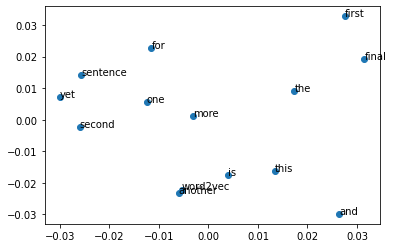

In [35]:
plt.scatter(x_transformed[:, 0], x_transformed[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(x_transformed[i, 0], x_transformed[i, 1]))


##### wczytywanie gotowych embeddingów


In [36]:
from gensim import downloader


In [37]:
glove_vectors = downloader.load("glove-wiki-gigaword-100")


In [38]:
result = glove_vectors.most_similar(
    positive=["woman", "king"], negative=["man"], topn=5
)
result


[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991)]

In [41]:
result = glove_vectors.most_similar(
    positive=["woman", "doctor"], negative=['man'], topn=5
)
result

[('nurse', 0.7735227942466736),
 ('physician', 0.7189430594444275),
 ('doctors', 0.6824328303337097),
 ('patient', 0.6750683188438416),
 ('dentist', 0.6726033091545105)]

In [ ]:
glove_vectors["i", "have", "a"].shape


### embeddingi fasttext
W Word2Vec tworzymy embeddingi słów w celu stworzenia embeddingu więc nie jesteśmy w stanie otrzymać embeddingu słowa spoza naszego słownika. Fasttext inaczej pochodzi do tworzenia embeddingów, ponieważ słowa, które są do siebie podobne(co do ogległości edycyjnej) powinny mieć podobne embeddingi postanowiono tworzyć je na podstawie n-gramów na znakach (dla n od 3 do 6). Jak to działa?
1) Dodajemy na początek słowa '<' a na koniec '>'.

![](Grafika/fasttext-angular-brackets.png)

2) tworzymy n-gramy dla słowa.
3) Ponieważ liczba n-gramów może być ogromna dlatego, zamiast trenować embeddingi dla każdego unikatowego n-grama, trenowane jest B (B-bucket size). Każdy n-gram jest przetwarzany przy użyciu funkcji hashującej do liczby całkowitej między 1 a B.
4) Do słownika dodajemy także słowa, które występują w zbiorze treningowym. Zatem mamy B+|V| embeddingów.

#### Jak trenowany jest fasttext?

Embeddingi są trenowane wykorzystując skip-gram z negatywnym próbkowaniem. Czyli na podstawie słowa chcemy przewidzieć słowa sąsiadujące. Ale embedding słowa na podstawie, którego chcemy przewidywać to suma n-gramów i embeddingu tego słowa.

![](Grafika/fasttext-negative-sampling-goal.png)



### Doc2Vec
Doc2Vec jest wykorzystaniem podobnego pomysłu co Word2Vec. Czyli na podstawie contekstu przewidujemy słowo. Ale skąd tutaj embedding dokumentu? Dodany jest dodatkowo embedding paragrafu jak na zdjęciu poniżej. Z dodatkiem tego embeddingu trenowany jest model  PV-DM(Distributed Memory version of Paragraph Vector) lub PV-DBOW(Words version of Paragraph Vector) (Podobny model do skip-gram).

![](Grafika/doc2vec_dbow.png) 
![](Grafika/doc2vec_skip_gram.png)

Jak zdobyć embedding nowego dokumentu? W tym celu zamrażane są wszystkie wagi sieci i jedyną zmienną jest embedding dokumentu, następnie ta zmienna jest aktualizowana trenując ją jak PV-DM lub PV-DBOW.

Możliwe też jest z wykorzystaniem Doc2Vec modelowanie gatunków. Zamiast unikatowego id można dodawać(dodatkowo lub jako jedyne wejście) tag związany z kategorią. W ten sposób otrzymamy embeddingi kategorii i po wyznaczeniu embeddingu danego dokumentu możemy powiedzieć do której kategorii on najprawdopodobniej należy.

![](Grafika/doc2vec_tag.png)

In [42]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tutaj możemy też podać kategorie
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


[parametry klasy Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html#introduction)

In [43]:
common_texts


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [44]:
x = model.infer_vector(["human", "interface", "computer"])


In [45]:
model.dv.most_similar(x)


[(4, 0.7519353628158569),
 (0, 0.38346174359321594),
 (2, 0.23076751828193665),
 (6, 0.22709029912948608),
 (5, 0.10591179132461548),
 (7, 0.004431864712387323),
 (3, -0.2476314902305603),
 (1, -0.638149082660675),
 (8, -0.7812461853027344)]

In [49]:
model.similarity_unseen_docs(["human", "response"], ["computer", "response"])

-0.7056741